In [1]:
import itertools
import numpy
import matplotlib
from matplotlib import patches
from matplotlib import pyplot
from pycbc import waveform
from pycbc.inference import io
from pycbc import conversions

from pycbc.results import scatter_histograms
from pycbc.pool import choose_pool


# PyCBC Inference Read Samples

In [2]:
filenames = {'GW190521': 'outlier/GW190521.hdf',
             'GW191109': 'outlier/GW191109.hdf'}
samples = {}
for lbl, fn in filenames.items():
    fp = io.loadfile(fn, 'r')
    s = fp.read_samples(['srcmchirp', 'q', 'parity_mpvinverse'])
    samples[lbl] = s
    fp.close()

In [3]:
filelabels = {'GW190521': 'GW190521',
              'GW191109': 'GW191109'}

In [4]:
labels = {'srcmchirp': waveform.parameters.srcmchirp.label,
          'q': waveform.parameters.q.label,
          'parity_mpvinverse':'$M_\mathrm{PV}^{-1} (\mathrm{GeV}^{-1})$'
         }

In [5]:
x = 'srcmchirp'
y = 'q'
z = 'parity_mpvinverse'
mins = {x: min(s[x].min() for s in samples.values()),
        y: min(s[y].min() for s in samples.values()),
        z: min(s[z].min() for s in samples.values())
       }
maxs = {x: max(s[x].max() for s in samples.values()),
        y: min(max(s[y].max() for s in samples.values()),8),
        z: max(s[z].max() for s in samples.values())
       }

In [6]:
pool = choose_pool(10)

In [7]:
%matplotlib inline

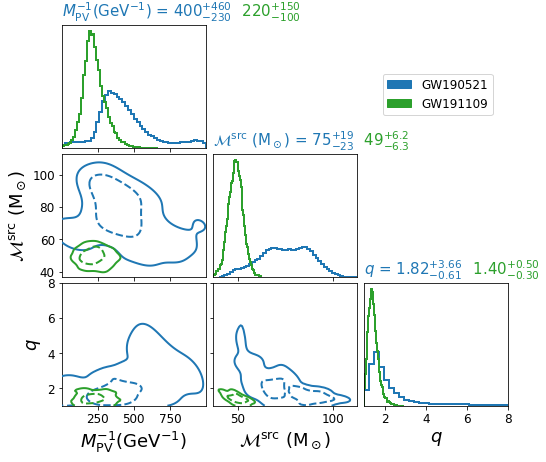

In [8]:
color_cycle = ['tab:blue','tab:green']
colors = itertools.cycle(color_cycle)
    
filecolors = {}
fig, axd = (None, None)
for run in ['GW190521','GW191109']:
    c = next(colors)
    filecolors[run] = c
    s = samples[run]
    fig, axd = scatter_histograms.create_multidim_plot(
        ['parity_mpvinverse', 'srcmchirp','q'], s, labels=labels,
        mins=mins, maxs=maxs,
        plot_scatter=False, plot_contours=True,
        marginal_percentiles=[], contour_percentiles=[50, 90],
        fill_color=None, contour_color=c, hist_color=c, line_color=c,
        contour_linestyles=['solid', 'dashed'], label_contours=False,
        use_kombine=True, kdeargs={'pool': pool, 'max_samples': 200},
        fig=fig, axis_dict=axd,
    )
    
    # add legend
handles = []
lbls = []
for run, c in filecolors.items():
    l = filelabels[run]
    handles.append(patches.Patch(color=c, label=l))
    lbls.append(l)
fig.legend(loc=(0.7, 0.75), handles=handles, labels=lbls)

fig.show()